<a href="https://colab.research.google.com/github/thedatadj/Covid19andHappiness/blob/main/Covid19Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid19 Data Analysis

## **Datasets**

#### **Covid 19**

In this notebook I work with the COVID19 dataset, published by John Hopkins University, which consists of the data related to cumulative number of confirmed cases, per day, in each country.

#### **Worlwide happiness**

Also I work with another dataset consisting of various life factors, scored by the people living in each country around the world.

## **My goal**

I am goin to merge these datasets to see if there is any relashionship between the spread of the virus in a country and how happy people are, living in that country.

## Import the modules

In [43]:
# @title
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

# Covid19

## Importing the covid19 dataset

In [44]:
# @title
covid_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Covid19Analysis/covid19_Confirmed_dataset.csv")

# View the data
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [45]:
# @title
# Shape of the dataframe

covid_data.shape

(266, 104)

## Preprocessing

### Delete the useless columns
I'm not going to need the `Lat` and `Long` columns for my analysis, so I will delete them from the dataset.

In [46]:
# @title
# I'm not going to use the `Lat` and `Long` columns

covid_data_2 = covid_data.drop(['Lat', 'Long'], axis=1)

#
s1 = "Number of columns in the dataset before: {}".format(covid_data.shape[1])
s2 = "\nNumber of columns in the dataset now: {}".format(covid_data_2.shape[1])
print(s1, s2)

Number of columns in the dataset before: 104 
Number of columns in the dataset now: 102


### Agregating the rows by the country
I am interest on the per country cases, this step will ensure that the data is based on the countries.

In [47]:
# @title
covid_data_3 = covid_data_2.groupby('Country/Region').sum()

<ipython-input-47-36128dc491c4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_data_3 = covid_data_2.groupby('Country/Region').sum()


In [48]:
# @title
covid_data_3.iloc[:,:10].head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20
Country/Region,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0


In [49]:
# @title
covid_data_3.shape

(187, 100)

## Let's visualize the data

<Axes: >

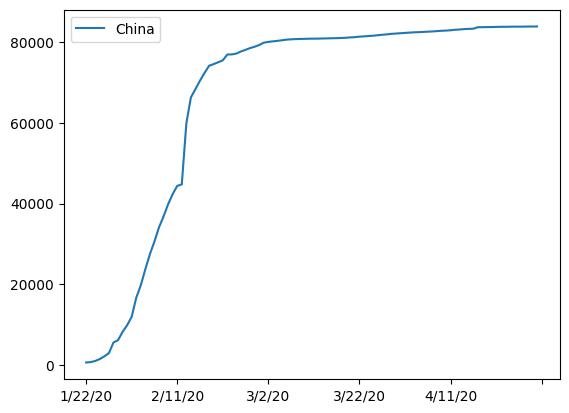

In [50]:
# @title
covid_data_3.loc['China'].plot(legend=True)

## Rate of change
I'm interested in the rate of change of the number of cases over time, so I'm going to calculate the derivative and graph it.

<Axes: >

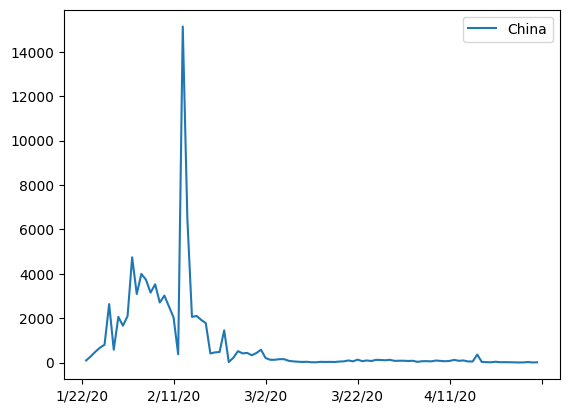

In [51]:
# @title
# The first derivative of the curve
covid_data_3.loc['China'].diff().plot(legend=True)

### What is the maximum infection rate in China?

In [52]:
# @title
# Maximum infection rate
covid_data_3.loc['China'].diff().max()

15136.0

### Maximum infection rate in each country.
Let's find out what was the maximum infection rate per country and compare.

<Axes: xlabel='Max infection rate', ylabel='Country/Region'>

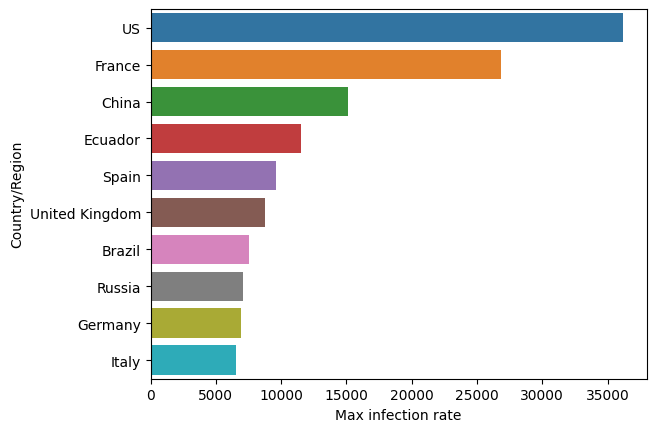

In [80]:
# List of countries
countries = list(covid_data_3.index)

# List of maximum infection rates per country
max_infec_rate = []


for country in countries:
  max_infec_rate.append(covid_data_3.loc[country].diff().max())

# Create a variable/column/feature containing the maximum infection rate of each country
covid_data_3['Max infection rate'] = max_infec_rate

# Maximum infection rate by country
covid_data_4 = pd.DataFrame(covid_data_3['Max infection rate'])

import seaborn as sns

datap = covid_data_4.sort_values(by="Max infection rate", ascending=False)[:10]

sns.barplot(data=datap, x='Max infection rate', y=datap.index)

# World happiness

## Load dataset

In [76]:
# @title
# World happiness dataset
happy_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Covid19Analysis/worldwide_happiness_report.csv')

print("Shape of the data is :", happy_data.shape)
happy_data.head()

Shape of the data is : (156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Preprocessing

### Delete the useless columns

In [77]:
# @title
columns_to_dropped = ['Overall rank','Score','Generosity','Perceptions of corruption']
happy_data.drop(columns_to_dropped, axis=1 , inplace=True)
print("Shape of the new data is :", happy_data.shape)
happy_data.head()

Shape of the new data is : (156, 5)


,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Change the index to be the countries

In [78]:
# @title
happy_data.set_index('Country or region', inplace=True)
happy_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


# Joining the datasets
Here I join the datasets to compare different life factors to the Maximum Infection Rate

In [81]:
# @title
joined_data = happy_data.join(covid_data_4).copy()
print("Shape of the joined dataset:", joined_data.shape)
joined_data.iloc[:, :8].head()

Shape of the joined dataset: (156, 5)


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Max infection rate
Country or region,,,,,
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0


## Correlation matrix
The correlation matric will give us an idea on which features are correlated with what.

In [84]:
# @title
joined_data.corr()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Max infection rate
GDP per capita,1.000000,0.754906,0.835462,0.379079,0.250118
Social support,0.754906,1.000000,0.719009,0.447333,0.191958
Healthy life expectancy,0.835462,0.719009,1.000000,0.390395,0.289263
Freedom to make life choices,0.379079,0.447333,0.390395,1.000000,0.078196
Max infection rate,0.250118,0.191958,0.289263,0.078196,1.000000


## Heatmap
This heatmap shows the correlation between the features with colors.

<Axes: >

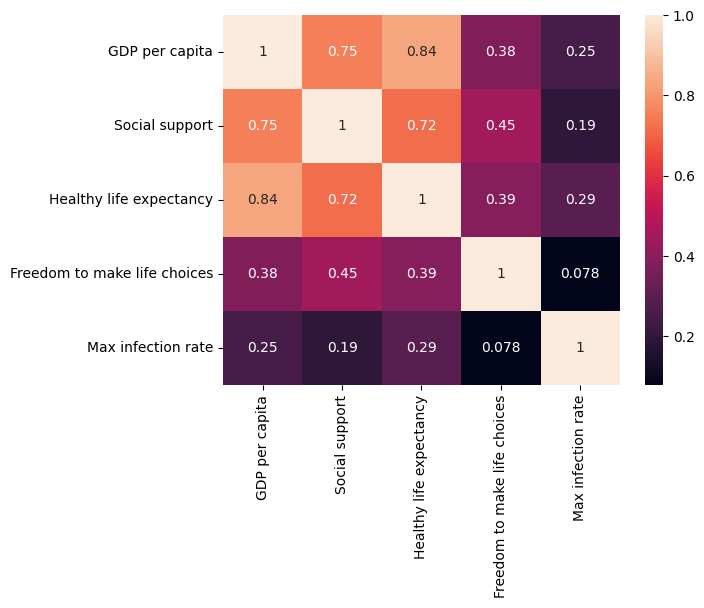

In [85]:
# @title
sns.heatmap(joined_data.corr(), annot=True)

## GDP vs Maximum Infection Rate

<Axes: xlabel='GDP per capita', ylabel='Max infection rate'>

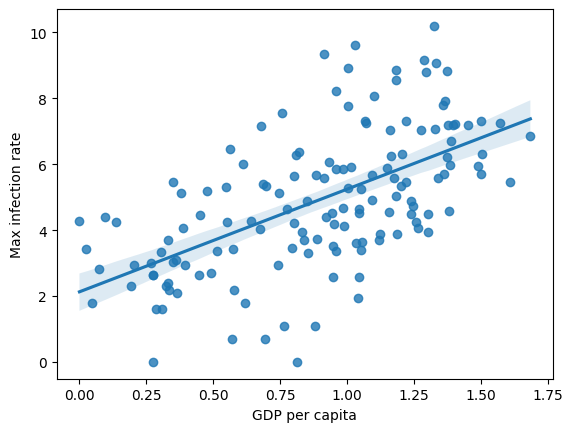

In [100]:
# @title
x = joined_data['GDP per capita']
y = joined_data['Max infection rate']
sns.regplot(x=x, y=np.log(y))

## Social support vs Max Infection Rate

<Axes: xlabel='Social support', ylabel='Max infection rate'>

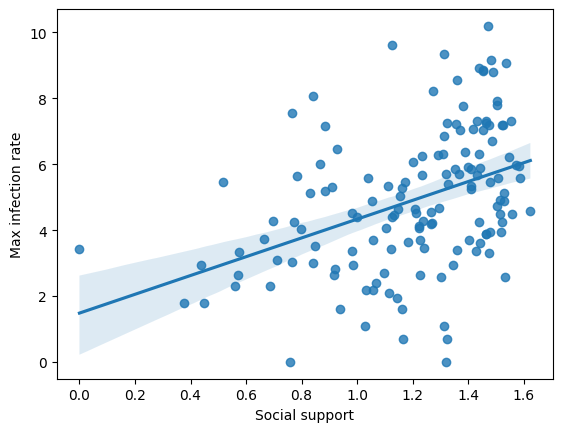

In [99]:
# @title
x = joined_data['Social support']
y = joined_data['Max infection rate']
sns.regplot(x=x,y=np.log(y))

## Healthy life expectancy vs Maximum Infection Rate

<Axes: xlabel='Healthy life expectancy', ylabel='Max infection rate'>

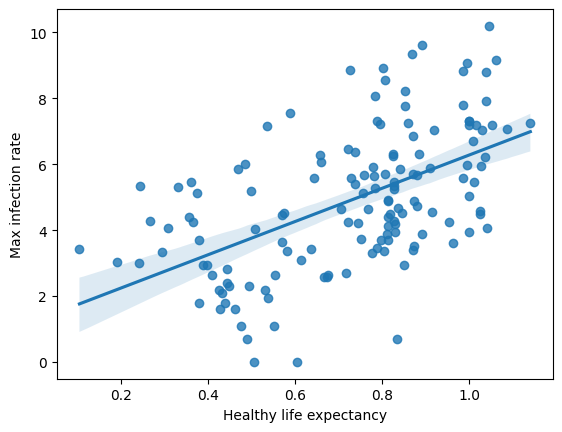

In [98]:
# @title
x = joined_data['Healthy life expectancy']
y = joined_data['Max infection rate']
sns.regplot(x=x, y=np.log(y))

## Freedom to make life choices vs Maximum Infection Rate

<Axes: xlabel='Freedom to make life choices', ylabel='Max infection rate'>

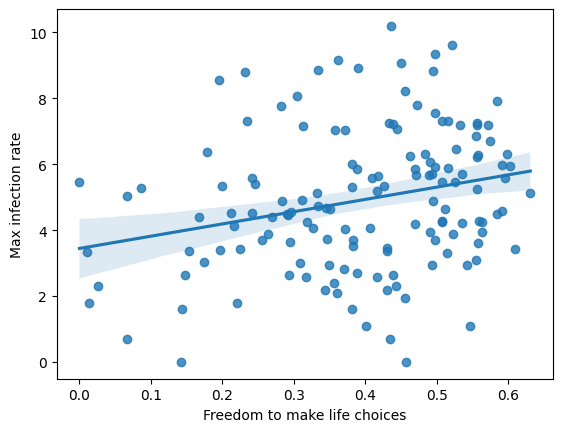

In [101]:
# @title
x = joined_data['Freedom to make life choices']
y = joined_data['Max infection rate']
sns.regplot(x=x, y=np.log(y))